In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import time

In [2]:
def generate_points(length) : 
    # Random generator for points in a box 
    points = np.random.uniform(0, 10, [length,2])
    return points

def distance(a, b) : 
    # Compute euclidean distance between 2 points
    dist = np.sqrt( (a[0] - b[0])**2 + (a[1] - b[1])**2 )
    return dist

def minimum_distance(points) :
    # Compute minimum distance by computing all the distances and 
    # sorting them  
    all_distances = np.empty(0)
    start_time = time.time()
    for i in enumerate(points) : 
        for j in range(i[0]+1, np.shape(points)[0]) : 
            dist = distance(i[1], points[j])
            all_distances = np.append(all_distances, dist)
    
    min_dist = np.min(all_distances)
    total_time = (time.time() - start_time)
    return(min_dist, total_time)

def new_distance(points) : 
    # Compute minimum distance via computing only points inside 
    # a specific distance from the selected one. 
    all_distances = np.empty(0)
    
    start_time = time.time()
    for i in range(1, np.shape(points)[0]) : 
        dist = distance(points[0], points[i])
        all_distances = np.append(all_distances, dist)

    min_dist = np.min(all_distances)
    
    for j in range(np.shape(all_distances)[0]) : 
        for k in range(j+1, np.shape(all_distances)[0]) : 
            if j == k : 
                continue
            else : 
                dd = abs(all_distances[j] - all_distances[k])
                if dd <= min_dist + all_distances[k] : 
                    new_dist = distance(points[j+1], points[k+1])
                    if new_dist < min_dist : 
                        min_dist = new_dist
    
    total_time = (time.time() - start_time)
    return min_dist, total_time
    

In [3]:
N = 300
distances = np.empty(0)
all_times = np.empty(0)

new_distances = np.empty(0)
new_all_times = np.empty(0)

for num in range(2, N) : 
    p = generate_points(num)
    
    min_dist, t = minimum_distance(p)
    distances = np.append(distances, min_dist)
    all_times = np.append(all_times, t)
    
    min_dist2, t2 = new_distance(p)
    new_distances = np.append(new_distances, min_dist2)
    new_all_times = np.append(new_all_times, t2)

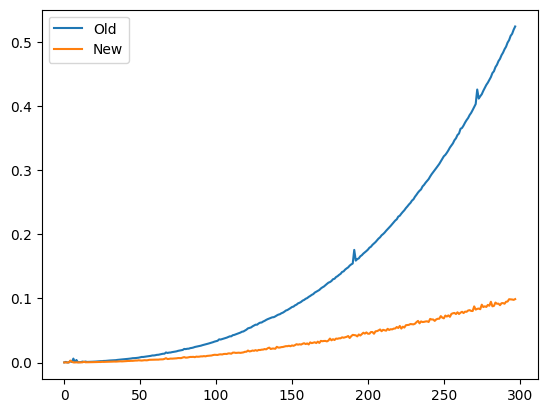

In [4]:
## Plot execution time scaling 

n = np.arange(0, N, 1)
plt.plot(all_times, label='Old')
plt.plot(new_all_times, label = 'New')
plt.legend()

In [5]:
## Check distances have been computed correctly

if (distances == new_distances).all() : 
    print('OK')
else : 
    print('Error')

OK
